In [2]:
import numpy as np
import matplotlib.pyplot as plt

[0.5839147347164464, 10.091757416895755]
max: 11.538368568016267 min: -33.077174510421585 barrier: 44.61554307843785
max: -8.927932862954549 min: -14.529100972301237 barrier: 5.601168109346688
max: 0.0 min: -5.628306193898435 barrier: 5.628306193898435
barrier only 2s: 44.61554307843785 barrier only 1s: 5.628306193898435 barrier of 2s with full 1 coverage: 5.601168109346688


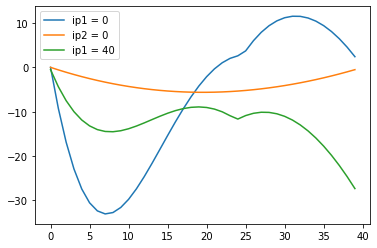

In [3]:
fig,ax= plt.subplots()
kmem = 20
def memBend(p,r):
    P = np.average(p)
    R = np.average(r)
    denom = R**2+P**2
    numon = np.pi*kmem*8*(P**2)
    Em = np.divide(numon,denom)
    if R<P:
        Em += np.pi*kmem*(np.divide(P,R) - 1)
    
    return Em

nummons = 40
radius = [9.06,6.25] #r=[20,9.06,6.25,6.25]
pitch = [2,10.15] #p=[0.1,2,10.15,75]
Ebind = [memBend(pitch[0],radius[0])/40,memBend(pitch[1],radius[1])/40]
print(Ebind)
Etot = np.zeros((nummons,nummons))
ipArr = np.zeros((nummons,nummons,2))#mon by mon array for 2 monomer types
Ps2 = []
Ps1 = []

for ip1 in range(nummons):
    for ip2 in range(nummons):
        ip = [ip1,ip2]
        totmons = ip1 + ip2
        Perc_mons = np.divide(ip,nummons)
        if ip1 ==0 and ip2 == 0:
            Etot[ip1,ip2] = 0
        else:
            Frac_mons = np.divide(ip,totmons)
            p = np.multiply(pitch, Perc_mons)
            r = np.multiply(radius, Frac_mons)
            Eb = np.multiply(ip,Ebind)
            Etot[ip1,ip2] = memBend(p,r)-Eb[0]-Eb[1]
        ipArr[ip1,ip2] = ip
        
x = np.arange(0,40,1)*100/40

ax.plot(Etot[0,:], label = 'ip1 = 0')
ax.plot(Etot[:,0], label = 'ip2 = 0')
ax.plot(Etot[39,:], label = 'ip1 = 40')

maxi_ip1_0 = max(Etot[0,:])
mini_ip1_0 = min(Etot[0,0:10])
print('max:',maxi_ip1_0,'min:',mini_ip1_0,'barrier:',maxi_ip1_0-mini_ip1_0)

maxi_ip1_39 = max(Etot[39,10:25]) #first 2 Etot[39,:], second Etot[39,10:25]
mini_ip1_39 = min(Etot[39,:10]) #first 2 Etot[39,:5], second Etot[39,:10]
#print(Etot[:,0])
print('max:',maxi_ip1_39,'min:',mini_ip1_39,'barrier:',maxi_ip1_39-mini_ip1_39)

maxi_ip2_0 = max(Etot[:,0])
mini_ip2_0 = min(Etot[0:25,0]) #first 2 Etot[0:20,0], second 2 Etot[0:25,0]
print('max:',maxi_ip2_0,'min:',mini_ip2_0,'barrier:',maxi_ip2_0-mini_ip2_0)

barrier0 = maxi_ip1_0-mini_ip1_0
barrier1 = maxi_ip2_0-mini_ip2_0
barrier2 = maxi_ip1_39-mini_ip1_39
print('barrier only 2s:',barrier0,'barrier only 1s:',barrier1,'barrier of 2s with full 1 coverage:', barrier2)
ax.legend()

In [ ]:
-31.126315932382454 -21.584165709858325
barrier 1: 281.008909439391 barrier 2: 44.61554307843785 barrier 3: -9.542150222524128